Examen final de iteligencia artificial 
Aprendisaje no supervidado
Machine learning
Diego Roberto Arancibia Delgado
Repositotio git: 

In [14]:
#importando librerias necesarias
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [15]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [16]:
data = pd.read_csv('data_0.csv', delimiter=",")

data

0      1      2      3     4      5      6      7      8      9  \
0      255.0  255.0  255.0  205.0  94.0  142.0  255.0  255.0  255.0  205.0   
1        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
49995    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49996    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49997    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49998    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49999    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   

         10     11     12     13     14     15     16     17     18     19  \
0      94.0  142.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49996   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49997   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49998   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49999   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          20     21     22     23     24     25     26     27     28     29  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          30     31     32     33     34     35     36     37     38     39  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          40     41     42     43     44     45     46     47     48     49  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2 

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [18]:
data

0      1      2      3     4      5      6      7      8      9  \
0      255.0  255.0  255.0  205.0  94.0  142.0  255.0  255.0  255.0  205.0   
1        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
49995    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49996    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49997    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49998    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   
49999    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0    0.0    0.0   

         10     11     12     13     14     15     16     17     18     19  \
0      94.0  142.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49996   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49997   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49998   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49999   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          20     21     22     23     24     25     26     27     28     29  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          30     31     32     33     34     35     36     37     38     39  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
49999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          40     41     42     43     44     45     46     47     48     49  \
0      255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2 

In [19]:
scaled_data

array([[ 2.23604562e+02,  2.23604562e+02,  2.23604562e+02, ...,
         2.23604562e+02,  2.23604562e+02,  2.23604562e+02],
       [-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03],
       [-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03],
       ...,
       [-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03],
       [-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03],
       [-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03]])

In [20]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


array([1, 0, 0, ..., 0, 0, 0])

In [21]:
kmeans.cluster_centers_

array([[-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03],
       [ 2.23604562e+02,  2.23604562e+02,  2.23604562e+02, ...,
         2.23604562e+02,  2.23604562e+02,  2.23604562e+02],
       [-4.47218068e-03, -4.47218068e-03, -4.47218068e-03, ...,
        -4.47218068e-03, -4.47218068e-03, -4.47218068e-03]])

In [22]:
import numpy as np


# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-0.00447218 -0.00447218 -0.00447218 ... -0.00447218 -0.00447218
  -0.00447218]
 [-0.00447218 -0.00447218 -0.00447218 ... -0.00447218 -0.00447218
  -0.00447218]
 [-0.00447218 -0.00447218 -0.00447218 ... -0.00447218 -0.00447218
  -0.00447218]
 [-0.00447218 -0.00447218 -0.00447218 ... -0.00447218 -0.00447218
  -0.00447218]]
Predicciones de cluster para las nuevas muestras:
[0 0 0 0]


Utilizaremos el metodo de la silueta para calcular el numero adecuado de cluster

C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  re

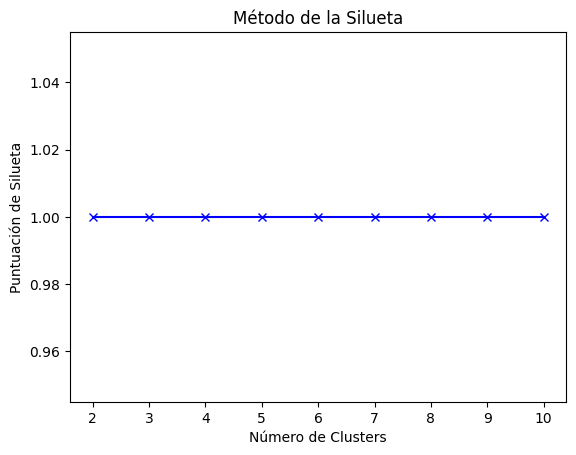

El número óptimo de clusters según la puntuación de silueta es: 2


In [24]:
import numpy as np
none_y = scaled_data[:, :-1]
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)
